In [2]:
!pip install opencv-python
!pip install tensorflow
!pip install imblearn

In [3]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import tensorflow as tf

### set the labels

In [4]:
emotions = ["angry","fear","happy","neutral","sad","surprise"]

#### path for training data

In [5]:
dataset_dir = "./train"

### visualizing the data

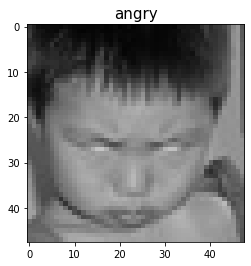

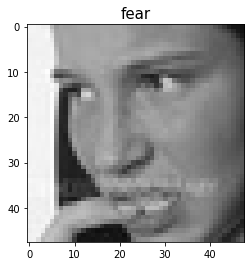

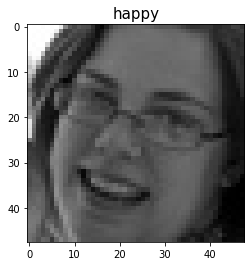

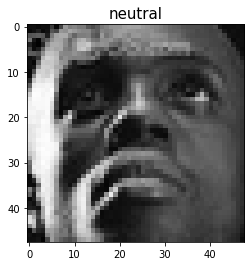

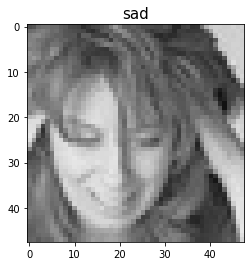

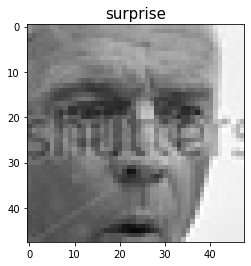

In [6]:
for emotion in emotions:
    path = os.path.join(dataset_dir,emotion)
    for img in os.listdir(path):
        img_array = cv.imread(os.path.join(path,img))
        plt.imshow(cv.cvtColor(img_array,cv.COLOR_BGR2RGB))
        plt.title(emotion, fontsize=15)
        plt.show()
        break        

## read through all the images and converting them to array

In [7]:
training_data = []

def create_training_data():
    for emotion in emotions:
        path = os.path.join(dataset_dir,emotion)
        class_label = emotions.index(emotion)
        for img in os.listdir(path):
            img_array = cv.imread(os.path.join(path,img))
            training_data.append([img_array,class_label])
            

In [8]:
create_training_data()

In [9]:
print(len(training_data))

28273


In [10]:
import random
random.shuffle(training_data)

### Creating the features and labels

In [11]:
X = [] ##feature
y = [] ##labels

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,48,48,3)

### Preprocessing

In [12]:
X.shape

(28273, 48, 48, 3)

In [13]:
X = X.astype(np.uint8)
X.dtype

dtype('uint8')

In [14]:
len(y)

28273

In [15]:
y = np.array(y)

In [16]:
y = y.astype(np.uint8)
y.dtype

dtype('uint8')

In [17]:
y[:5]

array([2, 4, 2, 0, 2], dtype=uint8)

In [18]:
X_rescaled = X/255
X_rescaled[:5]

array([[[[0.90588235, 0.90588235, 0.90588235],
         [0.7372549 , 0.7372549 , 0.7372549 ],
         [0.66666667, 0.66666667, 0.66666667],
         ...,
         [0.70196078, 0.70196078, 0.70196078],
         [0.9254902 , 0.9254902 , 0.9254902 ],
         [0.88627451, 0.88627451, 0.88627451]],

        [[0.89803922, 0.89803922, 0.89803922],
         [0.70980392, 0.70980392, 0.70980392],
         [0.64705882, 0.64705882, 0.64705882],
         ...,
         [0.68627451, 0.68627451, 0.68627451],
         [0.90980392, 0.90980392, 0.90980392],
         [0.89803922, 0.89803922, 0.89803922]],

        [[0.90980392, 0.90980392, 0.90980392],
         [0.70588235, 0.70588235, 0.70588235],
         [0.65098039, 0.65098039, 0.65098039],
         ...,
         [0.67843137, 0.67843137, 0.67843137],
         [0.89803922, 0.89803922, 0.89803922],
         [0.89803922, 0.89803922, 0.89803922]],

        ...,

        [[0.85098039, 0.85098039, 0.85098039],
         [0.82745098, 0.82745098, 0.82745098]

## Model Creation and Training

In [19]:
from tensorflow import keras

In [20]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3),activation='relu', padding='same',input_shape=(48, 48,3)),
    keras.layers.Conv2D(32, (3,3),activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(64, (5,5),activation='relu',padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(128, (5,5),activation='relu',padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(emotions), activation='softmax')
])

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics='accuracy')

model.fit(X_rescaled,y,epochs=50)

Epoch 1/50
884/884 [==============================] - 12s 10ms/step - loss: 1.5969 - accuracy: 0.3560
Epoch 2/50
884/884 [==============================] - 8s 9ms/step - loss: 1.3374 - accuracy: 0.4734
Epoch 3/50
884/884 [==============================] - 8s 9ms/step - loss: 1.2032 - accuracy: 0.5352
Epoch 4/50
884/884 [==============================] - 8s 9ms/step - loss: 1.1226 - accuracy: 0.5676
Epoch 5/50
884/884 [==============================] - 8s 9ms/step - loss: 1.0484 - accuracy: 0.5980
Epoch 6/50
884/884 [==============================] - 8s 9ms/step - loss: 0.9856 - accuracy: 0.6263
Epoch 7/50
884/884 [==============================] - 8s 9ms/step - loss: 0.9306 - accuracy: 0.6479
Epoch 8/50
884/884 [==============================] - 8s 9ms/step - loss: 0.8646 - accuracy: 0.6762
Epoch 9/50
884/884 [==============================] - 8s 9ms/step - loss: 0.8149 - accuracy: 0.6939
Epoch 10/50
884/884 [==============================] - 8s 9ms/step - loss: 0.7557 - accuracy: 0.72

## Creating Test Dataset

In [21]:
dataset_test_dir = "./test"

In [22]:
test_data = []

def create_test_data():
    for emotion in emotions:
        path = os.path.join(dataset_test_dir,emotion)
        class_label = emotions.index(emotion)
        for img in os.listdir(path):
            img_array = cv.imread(os.path.join(path,img))
            test_data.append([img_array,class_label])

In [23]:
create_test_data()

In [24]:
print(len(test_data))

7067


In [25]:
random.shuffle(test_data)

In [26]:
X_test = [] ##feature
y_test = [] ##labels

for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1,48,48,3)

X_test = X_test.astype(np.uint8)
X_test.dtype

dtype('uint8')

In [27]:
y_test = np.array(y_test)
y_test = y_test.astype(np.uint8)
y_test.dtype

dtype('uint8')

In [28]:
X_test_rescaled = X_test/255
X_test_rescaled[:5]

array([[[[0.56862745, 0.56862745, 0.56862745],
         [0.59607843, 0.59607843, 0.59607843],
         [0.38823529, 0.38823529, 0.38823529],
         ...,
         [0.11764706, 0.11764706, 0.11764706],
         [0.17647059, 0.17647059, 0.17647059],
         [0.25490196, 0.25490196, 0.25490196]],

        [[0.56078431, 0.56078431, 0.56078431],
         [0.58823529, 0.58823529, 0.58823529],
         [0.51372549, 0.51372549, 0.51372549],
         ...,
         [0.1254902 , 0.1254902 , 0.1254902 ],
         [0.14117647, 0.14117647, 0.14117647],
         [0.18039216, 0.18039216, 0.18039216]],

        [[0.56470588, 0.56470588, 0.56470588],
         [0.57647059, 0.57647059, 0.57647059],
         [0.56078431, 0.56078431, 0.56078431],
         ...,
         [0.12156863, 0.12156863, 0.12156863],
         [0.1254902 , 0.1254902 , 0.1254902 ],
         [0.15686275, 0.15686275, 0.15686275]],

        ...,

        [[0.59607843, 0.59607843, 0.59607843],
         [0.58039216, 0.58039216, 0.58039216]

In [29]:
y_test[:10]

array([1, 3, 3, 2, 1, 0, 2, 2, 4, 2], dtype=uint8)

In [30]:
y_pred = model.predict(X_test_rescaled)

In [31]:
y_pred_final= []
for i in range(len(y_pred)):
    y_pred_final.append(np.argmax(y_pred[i]))

In [32]:
y_pred_final[:10]

[3, 0, 3, 2, 4, 0, 3, 0, 4, 2]

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Print Classification Report and Confusion Matrix

In [34]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.54      0.50      0.52       958
           1       0.49      0.44      0.46      1024
           2       0.81      0.83      0.82      1774
           3       0.55      0.59      0.57      1233
           4       0.49      0.52      0.50      1247
           5       0.79      0.76      0.78       831

    accuracy                           0.62      7067
   macro avg       0.61      0.61      0.61      7067
weighted avg       0.62      0.62      0.62      7067



Text(69.0, 0.5, 'Truth')

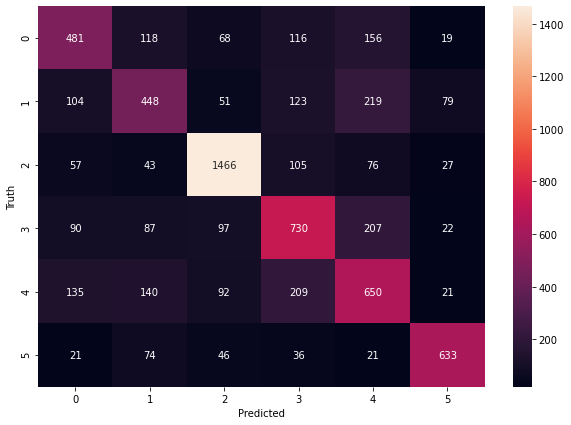

In [35]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_final)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Save the Model

In [41]:
if os.path.isfile('./face_detector_model.h5') is False:
    model.save('./face_detector_model.h5')

In [42]:
from tensorflow.keras.models import load_model
new_model = load_model('./face_detector_model.h5')

In [43]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0